In [3]:
# Code sourced from "networkx-W3L5" file
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [4]:
# Code sourced from "networkx-W3L5" file
# change defaults to be less ugly
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

In [5]:
# Import the csv file as a graph
G = nx.read_edgelist('./Iliad Data.csv', 
                        comments='#',
                        create_using=nx.Graph(), 
                        delimiter=',', 
                        nodetype=str,
                        data=[('weight', float), ('label', str)],
                        encoding='utf-8')

In [6]:
# Number of nodes and edges
print(G.number_of_nodes(), "nodes")
print(G.number_of_edges(), "edges")

516 nodes
1122 edges


In [7]:
print(nx.number_connected_components(G), "components")
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

4 components


[510, 2, 2, 2]

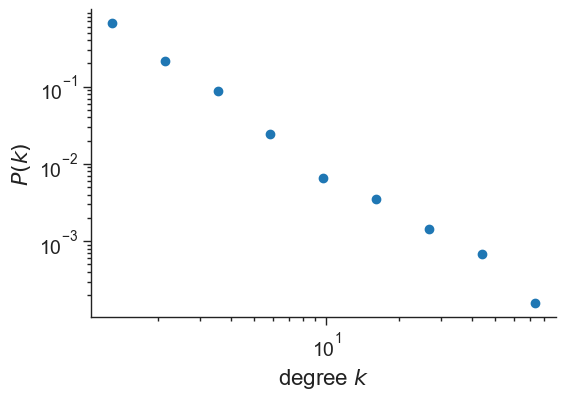

In [9]:
# Code sourced from "networkx-W3L5"
# log-log plot
degrees = [G.degree(node) for node in G]
kmin = min(degrees)
kmax = max(degrees)

# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

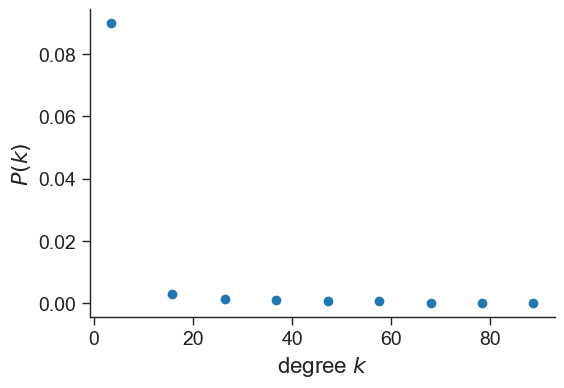

In [10]:
# Code sourced from "networkx-W3L5"
# linear plot
bin_edges = np.linspace(kmin, kmax, num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

In [24]:
# Code partially sourced from "Real World Networks - Null Models Exercise1"

GN = len(G.nodes()) # G.number_of_nodes()
max_L = GN*(GN-1)/2
actual_L = len(G.edges())
p = actual_L/max_L

# Get the largest connected component
largest_cc = max(nx.connected_components(G), key=len)
G_sub = G.subgraph(largest_cc).copy()

# Compute the average shortest path length
C = np.mean(list(nx.clustering(G_sub).values()))
d = nx.average_shortest_path_length(G_sub,weight="weight")

print("Average Clustering Coefficient: ", C)
print("Average Shortest Path: ", d)

Average Clustering Coefficient:  0.24050740728149514
Average Shortest Path:  3.9614468970299317
